In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 93.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=cfdbd8fa503b2e92b26b3059ad3bb3501500783651ed21fe5068ce105106bc60
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


# Python Libraries #

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing



# Data Preparation

In [ ]:
data = pd.read_csv("/content/employee_promotion.csv")


#### Dropping unnecessary features

In [ ]:
data=data.drop(columns=['employee_id'])

## Pre traitement

####Encoding categorical features

In [ ]:
pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['region'])
data['region'] = encpro


In [ ]:
data = pd.get_dummies(data, columns=['department', 'gender', 'recruitment_channel'], dtype=int)


#### NULL

In [ ]:
data['previous_year_rating'].fillna(value=0,inplace=True)

Education and Previous_Year_rating null values

In [ ]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [ ]:
data.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
awards_won,0


#### Label and features


In [ ]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

# Model Building

## INTIAL DATA

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### TRAIN

In [ ]:
topt= TPOTClassifier(generations=10, population_size=20 ,verbosity=2,random_state=42)

In [ ]:
topt.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9380164212172553

Generation 2 - Current best internal CV score: 0.9393457578522091

Generation 3 - Current best internal CV score: 0.9393457578522091

Generation 4 - Current best internal CV score: 0.9393457578522091

Generation 5 - Current best internal CV score: 0.9407011599113776

Generation 6 - Current best internal CV score: 0.9407011599113776

Generation 7 - Current best internal CV score: 0.9407011599113776

Generation 8 - Current best internal CV score: 0.9407011599113776

Generation 9 - Current best internal CV score: 0.9407011599113776

Generation 10 - Current best internal CV score: 0.9407011599113776

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


TPOTClassifier(generations=10, population_size=20, random_state=42, verbosity=2)

### Evaluation

##### Accuracy

In [ ]:
accuracy=topt.score(X_test, y_test)

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accuracy)) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.94


### EXPORT

In [ ]:
topt.export('model_best.py')

## Upsampled data

In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns


#### Data Split for Validation

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

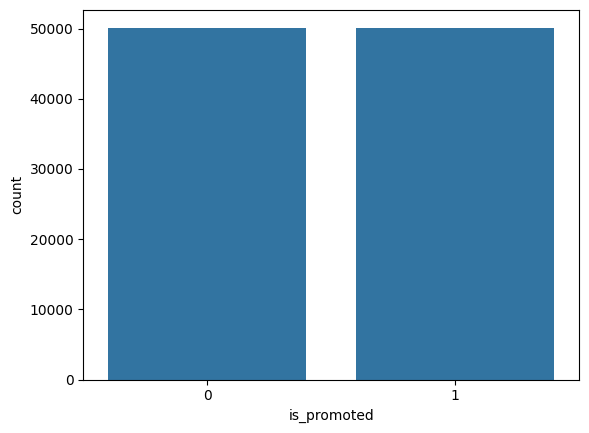

In [ ]:
sns.countplot(data= data, x = y_up)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

### TRAIN

In [ ]:
topt= TPOTClassifier(generations=10, population_size=20 ,verbosity=2,random_state=42)

In [ ]:
topt.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.939398261538015

Generation 2 - Current best internal CV score: 0.939398261538015

Generation 3 - Current best internal CV score: 0.9424183912580523

Generation 4 - Current best internal CV score: 0.9424183912580523

Generation 5 - Current best internal CV score: 0.9453957362163076

Generation 6 - Current best internal CV score: 0.9459798386221208

Generation 7 - Current best internal CV score: 0.9459798386221208

Generation 8 - Current best internal CV score: 0.9463217270813965

Generation 9 - Current best internal CV score: 0.9463217270813965

Generation 10 - Current best internal CV score: 0.9463217270813965

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.4, min_samples_leaf=1, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=10, population_size=20, random_state=42, verbosity=2)

### Evaluation

##### Accuracy

In [ ]:
accuracy=topt.score(X_test, y_test)

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accuracy)) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.95


### EXPORT

In [ ]:
topt.export('model_best_upsampled.py')

## Upsampled data Smote + Tomek

In [ ]:
from imblearn.combine import SMOTETomek
import seaborn as sns


#### Data Split for Validation

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

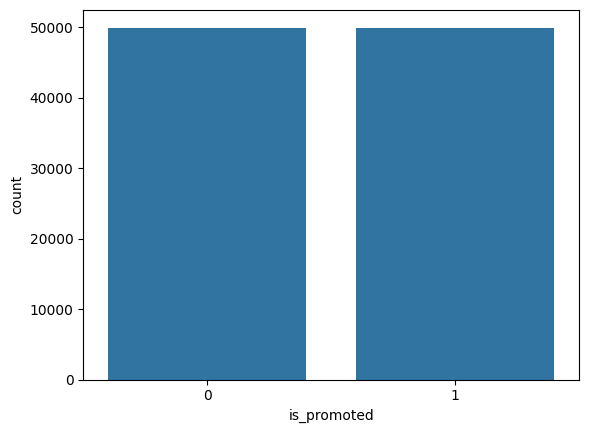

In [ ]:
sns.countplot(data= data, x = y_up)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

### TRAIN

In [ ]:
topt= TPOTClassifier(generations=10, population_size=20 ,verbosity=2,random_state=42)

In [ ]:
topt.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9175759025119146

Generation 2 - Current best internal CV score: 0.9352648095909697

Generation 3 - Current best internal CV score: 0.9413850930259023

Generation 4 - Current best internal CV score: 0.9413850930259023

Generation 5 - Current best internal CV score: 0.9413850930259023

Generation 6 - Current best internal CV score: 0.9430867977947409

Generation 7 - Current best internal CV score: 0.9430867977947409

Generation 8 - Current best internal CV score: 0.9452746396622853

Generation 9 - Current best internal CV score: 0.9468762157044133

Generation 10 - Current best internal CV score: 0.9468762157044133

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=3, n_estimators=100)


TPOTClassifier(generations=10, population_size=20, random_state=42, verbosity=2)

### Evaluation

##### Accuracy

In [ ]:
accuracy=topt.score(X_test, y_test)

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accuracy)) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.95


### EXPORT

In [ ]:
topt.export('model_best_upsampled-tom.py')

## Upsampled data Smote + ENN

In [ ]:
from imblearn.combine import SMOTEENN
import seaborn as sns


#### Data Split for Validation

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

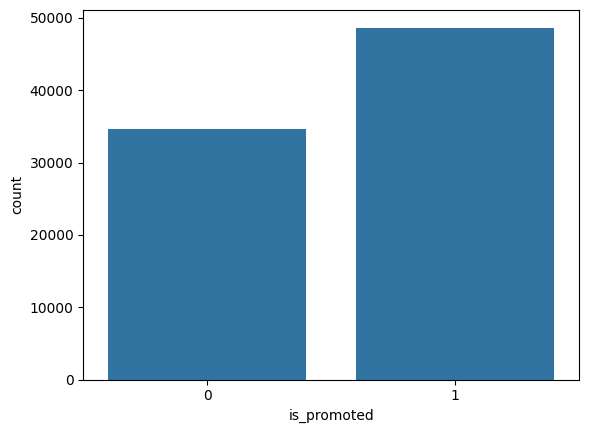

In [ ]:
sns.countplot(data= data, x = y_up)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

### TRAIN

In [ ]:
topt= TPOTClassifier(generations=10, population_size=20 ,verbosity=2,random_state=42)

In [ ]:
topt.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9504253041549683

Generation 2 - Current best internal CV score: 0.9529974867468635

Generation 3 - Current best internal CV score: 0.9529974867468635

Generation 4 - Current best internal CV score: 0.9529974867468635

Generation 5 - Current best internal CV score: 0.9529974867468635

Generation 6 - Current best internal CV score: 0.9651896739563182

Generation 7 - Current best internal CV score: 0.9651896739563182

Generation 8 - Current best internal CV score: 0.9651896739563182

Generation 9 - Current best internal CV score: 0.9651896739563182

Generation 10 - Current best internal CV score: 0.9651896739563182

Best pipeline: KNeighborsClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=4, n_estimators=100), n_neighbors=3, p=1, weights=distance)


TPOTClassifier(generations=10, population_size=20, random_state=42, verbosity=2)

### Evaluation

##### Accuracy

In [ ]:
accuracy=topt.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accuracy)) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.97


### EXPORT

In [ ]:
topt.export('model_best_upsampled-enn.py')

## Downsample data

#### Data Split for Validation

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25120,7,19,0,1,0,3,29,0.0,1,0,53.0,0
7,4,27,2,1,2,1,33,3.0,6,0,63.0,0
11808,7,4,2,1,2,1,47,5.0,15,0,53.0,0
19909,7,18,2,0,0,1,35,1.0,5,0,47.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

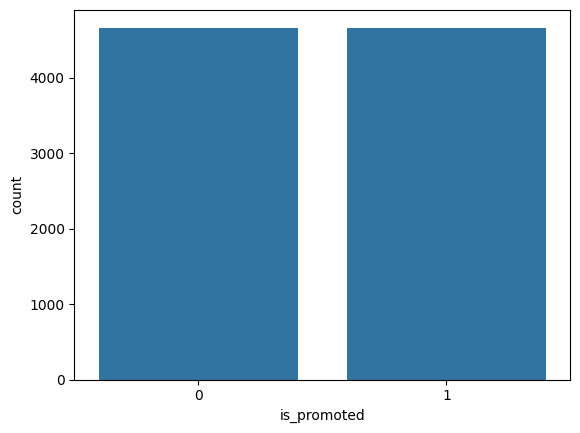

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

### TRAIN

In [ ]:
topt= TPOTClassifier(generations=10, population_size=20 ,verbosity=2,random_state=42)

In [ ]:
topt.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7176740627390972

Generation 2 - Current best internal CV score: 0.7202754399387912

Generation 3 - Current best internal CV score: 0.7234889058913542

Generation 4 - Current best internal CV score: 0.7234889058913542

Generation 5 - Current best internal CV score: 0.7234889058913542

Generation 6 - Current best internal CV score: 0.7234889058913543

Generation 7 - Current best internal CV score: 0.7251721499617445

Generation 8 - Current best internal CV score: 0.7253251721499618

Generation 9 - Current best internal CV score: 0.7267023718439174

Generation 10 - Current best internal CV score: 0.7267023718439174

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.55, verbosity=0)


TPOTClassifier(generations=10, population_size=20, random_state=42, verbosity=2)

### Evaluation

##### Accuracy

In [ ]:
accuracy=topt.score(X_test, y_test)

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accuracy)) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.71


### EXPORT

In [ ]:
topt.export('model_best_downsampled.py')